In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Загружаем данные из файла json

In [3]:
with open('train_01.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [4]:
obj

{'inside': [[0.7295200749361322, 0.7286337326606256],
  [0.826505923560258, 0.9403158114766519],
  [0.6023139955320228, 0.4890999051968531],
  [0.7924301535257385, 0.9724603339895345],
  [0.3739062132424882, 0.3807945141554343],
  [0.5213825315815278, 0.7011647516840395],
  [0.5799489554848042, 0.860210492806848],
  [0.4472712889659769, 0.23208680582951224],
  [0.8266928088733442, 0.9708616047497776],
  [0.2096090384196102, 0.07948946448504302],
  [0.33832612728389067, 0.4113630733104253],
  [0.68383264433507, 0.9003136248995234],
  [0.3974079484193441, 0.44643242592599985],
  [0.26193673674112883, 0.20727182114712916]],
 'outside': [[0.846590438950232, 0.12680486596335516],
  [0.11671041192819076, 0.8523469688748586],
  [0.8939436660435063, 0.20441969005621619],
  [0.196515524259539, 0.7563403480339516],
  [0.762462325724514, 0.17675381094088127],
  [0.8646206065391742, 0.4289513713302239],
  [0.7086382515784717, 0.1718070095596751],
  [0.07308462517167347, 0.7068687883532849],
  [0.7

In [5]:
df = pd.DataFrame(obj['inside'], columns = ['x', 'y'])
df['k'] = 1
for line in obj['outside']:
    df = df.append({'x': line[0], 'y': line[1], 'k': -1}, ignore_index=True)
    
    

In [6]:
df

,x,y,k
0,0.729520,0.728634,1.0
1,0.826506,0.940316,1.0
2,0.602314,0.489100,1.0
3,0.792430,0.972460,1.0
4,0.373906,0.380795,1.0
5,0.521383,0.701165,1.0
6,0.579949,0.860210,1.0
7,0.447271,0.232087,1.0
8,0.826693,0.970862,1.0
9,0.209609,0.079489,1.0


#### Выводим график с нашими данными (зеленый - "1" , красный -"-1")

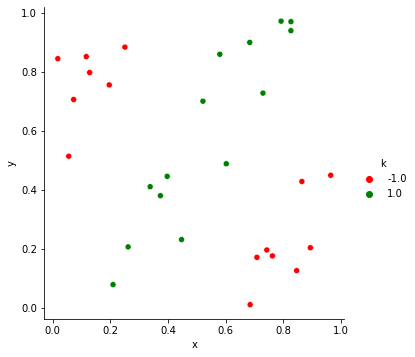

In [7]:
sns.pairplot(x_vars = ["x"],
    y_vars = ["y"],
    data = df,
    hue = "k",
    height = 5,
    palette = {-1:"red", 1:"green"}
)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['x', 'y']], df['k'], test_size=0.2, random_state=35)
print(x_train.shape) 
print(x_test.shape)



(23, 2)
(6, 2)


In [9]:
w1 = np.random.sample(6)

x_t = np.array(x_train)
y_t = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [10]:
print(len(w1), w1)

6 [0.1135184  0.57307648 0.72725582 0.85232457 0.61500812 0.9268058 ]


In [11]:
def get_x1(x):
    return np.array([1, x[0], x[1], x[0]**2, x[1]**2, x[0]*x[1]])


In [12]:
def predict(w, x, k):
    activation = k*(np.dot(w, x))
    if activation >= 0: return 1
    else: return 0

In [13]:
def Kozinets_algorythm(df, x, k, w1):
    for j in range (0, 20):
        errors = 0
       
        for i in range (len(df)):
            x1 = get_x1(x[i])
            if predict(w1, x1, k[i])==0:
                errors = errors + 1
                g = (np.dot(x1, x1) - k[i]*np.dot(w1, x1))/(np.dot(w1,w1) - 2*k[i]*np.dot(w1, x1) + np.dot(x1, x1))
                w1 = g*w1 + k[i]*(1-g)*x1

        print("Step=%d, Errors=%d" % (j, errors))
        if errors == 0: break
            
    print(w1)
    return w1

In [15]:
w1 = Kozinets_algorythm(x_train, x_t, y_t, w1)

Step=0, Errors=8
Step=1, Errors=8
Step=2, Errors=7
Step=3, Errors=4
Step=4, Errors=4
Step=5, Errors=4
Step=6, Errors=4
Step=7, Errors=3
Step=8, Errors=2
Step=9, Errors=0
[ 0.00682617 -0.02035135 -0.00829168 -0.01602276 -0.0182197   0.06777576]


In [16]:
def get_plot (df, w):
    fig = plt.figure(figsize=(10,8))
    g = sns.pairplot(x_vars = ["x"],
        y_vars = ["y"],
        data = df,
        hue = "k",
        height = 5,
        palette = {-1:"red", 1:"green"}
    )

    x_plot = np.linspace(min(df['x']), max(df['x']), 100)
    y_plot = np.linspace(min(df['y']), max(df['y']), 100)

    x_plot,y_plot = np.meshgrid(x_plot,y_plot)

    Z = w1[0]+x_plot*w1[1] + y_plot*w1[2]+w1[3]*x_plot**2 + w1[4]*y_plot**2 + w1[5]*x_plot*y_plot

    plt.contour(x_plot,y_plot,(Z),[0])

<Figure size 720x576 with 0 Axes>

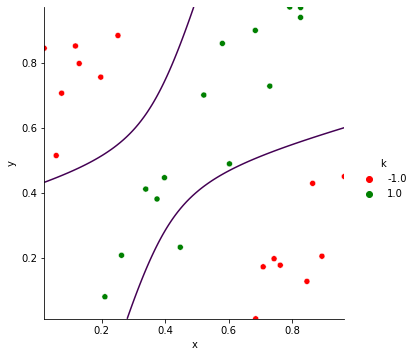

In [17]:
get_plot(df, w1)